In [5]:
%load_ext autoreload
%autoreload all
%matplotlib inline

In [6]:
from pathlib import Path

from xmipy.errors import XMIError

from pymf6.mf6 import MF6
from pymf6.api import create_mutable_bc

In [13]:
def show_ibound(model_name):
    mf6= MF6(f'models/{model_name}/mfsim.nam', use_modflow_api=True)
    wel = mf6.models['gwf6'].wel
    print(wel.stress_period_data.dataframe)
    for name in wel.advanced_vars:
        if 'bound' in name:
            try:
                print(name, wel.get_advanced_var(name))
            except XMIError:
                print(f'no value for {name}')

In [14]:
show_ibound('c_100_100_multi_well')

    nodelist      q  PYMF6_ANALYTIC
0  (0, 1, 2) -100.0             1.0
1  (0, 5, 6) -250.0             0.0
2  (0, 2, 4) -150.0             1.0
inamedbound [1]
bound [0.e+000 0.e+000 5.e-324]
no value for boundname
boundname_cst ['' '' '']
boundname_idm ['MF_PUMP1' 'MF_PUMP2' 'MF_PUMP2']


In [9]:
show_ibound('c_100_100')

inamedbound [0]
bound [0.]
no value for boundname
boundname_cst []
boundname_idm []


In [47]:
def make_analytic_wells(model_name, analytic_col_name='PYMF6_ANALYTIC'):
    mf6= MF6(f'models/{model_name}/mfsim.nam', use_modflow_api=True)
    wel = mf6.models['gwf6'].wel
    df = wel.stress_period_data.dataframe
    if wel.get_advanced_var('inamedbound')[0]:
        df['wel_names'] = [name.lower() for name in wel.get_advanced_var('boundname_idm')]
    analytic_col = df.get(analytic_col_name)
    if analytic_col is not None:
        df = df[analytic_col > 0]
        df = df.drop(analytic_col_name, axis=1)
    return df

In [52]:
ana = make_analytic_wells('c_100_100_multi_well')
ana

,nodelist,q,wel_names
0,"(0, 1, 2)",-100.0,mf_pump1
2,"(0, 2, 4)",-150.0,mf_pump2


In [53]:
ana.wel_names

0    mf_pump1
2    mf_pump2
Name: wel_names, dtype: object

In [46]:
make_analytic_wells('c_100_100')

,nodelist,q
0,"(0, 5, 5)",-500.0


In [37]:
df['new'] = a>0

In [40]:
df.drop('PYMF6_ANALYTIC', axis=1)

,nodelist,q,wel_names,new
0,"(0, 1, 2)",-100.0,mf_pump1,True
1,"(0, 5, 6)",-250.0,mf_pump2,False
2,"(0, 2, 4)",-150.0,mf_pump2,True


In [51]:
wel_multi = mf6_multi_wel.models['gwf6'].wel
wel_single = mf6_single_well.models['gwf6'].wel

In [10]:
wel = create_mutable_bc(gwf.wel)

In [11]:
wel

,nodelist,q,ANALYTIC
0,"(0, 1, 2)",-100.0,1.0
1,"(0, 5, 6)",-250.0,0.0
2,"(0, 2, 4)",-150.0,1.0


In [13]:
gwf.wel.stress_period_data.values

rec.array([((0, 1, 2), -100., 1.), ((0, 5, 6), -250., 0.),
           ((0, 2, 4), -150., 1.)],
          dtype=[('nodelist', 'O'), ('q', '<f8'), ('ANALYTIC', '<f8')])

In [20]:
a_multi = set(gwf.wel.advanced_vars)

In [27]:
gwf.wel.get_advanced_var('inamedbound')

array([116], dtype=int32)

In [18]:
wel_single = mf6_single_well.models['gwf6'].wel

In [21]:
a_single = set(wel_single.advanced_vars)

In [22]:
a_multi - a_single

set()

In [23]:
a_single - a_multi

set()

In [25]:
wel_single.get_advanced_var('inamedbound')[0]

0

In [28]:
[x for x in wel_single.advanced_vars if 'bound' in x]

['inamedbound', 'bound', 'boundname', 'boundname_cst', 'boundname_idm']

In [54]:
import pandas as pd

In [55]:
df = pd.DataFrame({'a': ['x', 'y', 'z', 'x']})

In [56]:
df

,a
0,x
1,y
2,z
3,x


In [62]:
df.a.is_unique

False

In [65]:
import run_controlled

In [110]:
MF6?

Init signature:
MF6(
    nam_file=None,
    sim_file='mfsim.nam',
    dll_path=None,
    use_modflow_api=True,
    advance_first_step=True,
    verbose=False,
    _develop=False,
)
Docstring:     
Wrapper around XmiWrapper and modflowapi.

`advance_first_step = True` progresses to the first model step with
model time > 0. This is needed to access any internal values of BCs.
File:           ~/Dev/pymf6/src/pymf6/mf6.py
Type:           type
Subclasses:     

In [119]:
model_name = 'c_100_100_multi_well'
mf6 = MF6(f'models/{model_name}/mfsim.nam', use_modflow_api=True) #, advance_first_step=False)
gwf = mf6.models['gwf6']
next(mf6.model_loop())
gwf.kper

1

In [ ]:
run_controlled.make_analytic_well_cells(mf6.models['gwf6'].wel)

In [145]:
{name: {'index': index, 'q': q} for name, q, index in zip(df['wel_names'], df['q'], df.index)}

{'mf_pump1': {'index': 0, 'q': -100.0},
 'mf_pump3': {'index': 2, 'q': -150.0},
 'mf_pump4': {'index': 3, 'q': -100.0}}

In [140]:
df.to_dict(orient='list')

{'nodelist': [(0, 1, 2), (0, 2, 4), (0, 6, 6)],
 'q': [-100.0, -150.0, -100.0],
 'wel_names': ['mf_pump1', 'mf_pump3', 'mf_pump4']}

In [128]:
{name: index for name, index in zip(df['wel_names'], df.index)}

{'mf_pump1': 0, 'mf_pump3': 2, 'mf_pump4': 3}

In [117]:
wel = mf6.models['gwf6'].wel

In [118]:
wel.stress_period_data.dataframe

,nodelist,q,PYMF6_ANALYTIC
0,"(0, 1, 2)",-100.0,1.0
1,"(0, 5, 6)",-250.0,0.0


In [160]:
res = run_controlled.run_model()

In [150]:
res.keys()

dict_keys(['mf_pump1', 'mf_pump3', 'mf_pump4'])

In [152]:
res['mf_pump1'][-1]

(Model, {'pump1': 11.93562054549896})

In [153]:
for name, values in res.items():
    print(name, values[-1])

mf_pump1 (Model, {'pump1': 11.93562054549896})
mf_pump3 (Model, {'pump1': 11.857517679564522})
mf_pump4 (Model, {'pump1': 11.461774796970069})


In [156]:
res = run_controlled.run_model()

In [157]:
for name, values in res.items():
    print(name, values[-1])

mf_pump1 (Model, {'pump1': 10.009419435632376})
mf_pump3 (Model, {'pump1': 9.198662001512465})
mf_pump4 (Model, {'pump1': 7.142060257949945})


In [224]:
well_data = {
    1:
    {'mf_pump1':
             [
                 {'name': 'pump1', 'coords': (220, 120), 'rate_fraction': 0.3},
                 {'name': 'pump2', 'coords': (270, 170), 'rate_fraction': 0.7},
             ]
            },
     2:
    {'mf_pump2':
             [
                 {'name': 'pump1', 'coords': (220, 120), 'rate_fraction': 0.3},
                 {'name': 'pump2', 'coords': (270, 170), 'rate_fraction': 0.7},
             ]
            }
}

In [225]:
res = run_controlled.run_model(analytic_well_data=well_data)

In [226]:
for name, values in res[1].items():
    print(name, values[-1])

mf_pump1 (Model, {'pump1': 11.003549463086442, 'pump2': 10.343825724456343})
mf_pump3 (Model, {'pump1': 9.198662001512465})
mf_pump4 (Model, {'pump1': 7.142060257949945})


In [227]:
for name, values in res[2].items():
    print(name, values[-1])

KeyError: 2

In [174]:
2000 - ((2 * 250 + 2 * 400) / 1.23)

943.0894308943089

In [173]:
(2 * 250 - 2 * 400) / 1.23

-243.90243902439025

In [175]:
500 / 1.23

406.5040650406504

In [176]:
406.5 * 1.23

499.995

In [263]:
well_data = {
    1:
    {'mf_pump1':
             [
                 {'name': 'pump1', 'coords': (220, 120), 'rate_fraction': 0.3},
                 {'name': 'pump2', 'coords': (270, 170), 'rate_fraction': 0.7},
             ]
            },
     2:
    {'mf_pump5':
             [
                 {'name': 'pump1', 'coords': (220, 120), 'rate_fraction': 0.3},
                 {'name': 'pump2', 'coords': (270, 170), 'rate_fraction': 0.7},
             ]
            }
}

In [336]:
import json

In [397]:
with open('well_data.json') as fobj:
    well_data = json.load(fobj)

In [398]:
well_data = {int(k):v for k, v in well_data.items()}

In [399]:
r = run_controlled.run_model(model_path_controlled='models/c_100_100_mw_ms', analytic_well_data=well_data)

In [ ]:
r

In [341]:
p1 = r['1']['awells']['mf_pump1']

KeyError: '1'

In [315]:
p1.win

[200.0, 300.0, 100.0, 200.0]

In [311]:
p1.xys

{'cell_center': (250.0, 150.0),
 'cell_left': (150.0, 150.0),
 'cell_right': (350.0, 150.0),
 'cell_top': (250.0, 250.0),
 'cell_bot': (250.0, 550.0),
 'cell_bot_left': (150.0, 550.0),
 'cell_bot_right': (350.0, 550.0),
 'cell_top_left': (150.0, 250.0),
 'cell_top_right': (350.0, 250.0),
 'corner_top_left': (200.0, 200.0),
 'corner_top': (250.0, 200.0),
 'corner_top_right': (300.0, 200.0),
 'corner_right': (300.0, 150.0),
 'corner_bot_right': (300.0, 100.0),
 'corner_bot': (250.0, 100.0),
 'corner_bot_left': (200.0, 100.0),
 'corner_left': (200.0, 150.0)}

In [296]:
m = value[-1][0]

In [318]:
r[1]

{'well_levels': {'mf_pump1': [(Model,
    {'pump1': 11.01102725851458, 'pump2': 10.35213662398551}),
   (Model, {'pump1': 11.006091500637739, 'pump2': 10.345638610646189}),
   (Model, {'pump1': 11.006124157463336, 'pump2': 10.345566643099428}),
   (Model, {'pump1': 11.005858004976663, 'pump2': 10.345208864516746}),
   (Model, {'pump1': 11.005837268015744, 'pump2': 10.345173652916865}),
   (Model, {'pump1': 11.005824965867571, 'pump2': 10.345158029561402}),
   (Model, {'pump1': 11.005821394016394, 'pump2': 10.34515242293614}),
   (Model, {'pump1': 11.005819967124234, 'pump2': 10.345150659332718}),
   (Model, {'pump1': 11.005819604567929, 'pump2': 10.345150085061308})],
  'mf_pump3': [(Model, {'pump1': 9.258965104619607}),
   (Model, {'pump1': 9.25034746772003}),
   (Model, {'pump1': 9.249765689913218}),
   (Model, {'pump1': 9.24925448012387}),
   (Model, {'pump1': 9.249189545380778}),
   (Model, {'pump1': 9.249169725925325}),
   (Model, {'pump1': 9.249159795038864}),
   (Model, {'pump1'

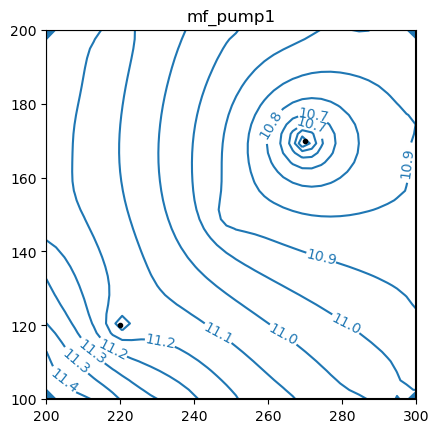

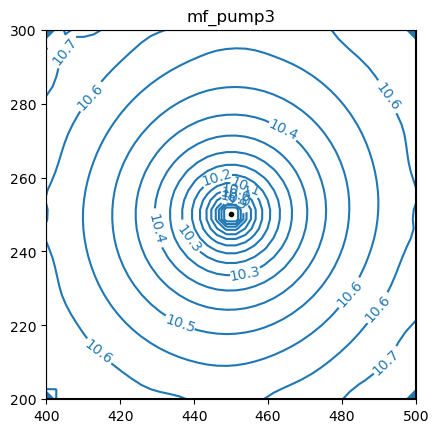

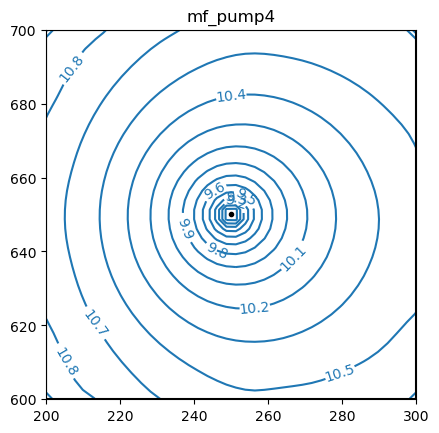

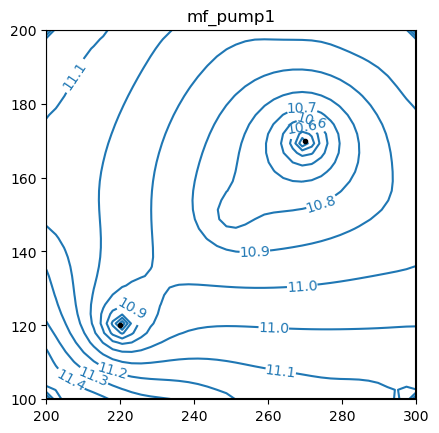

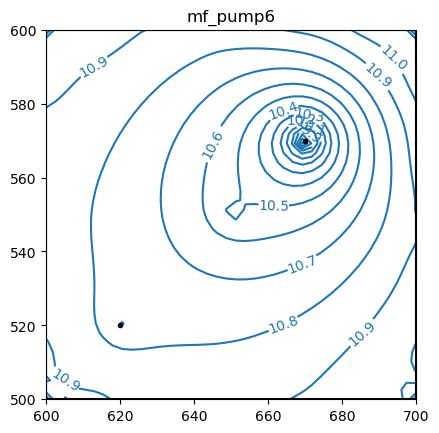

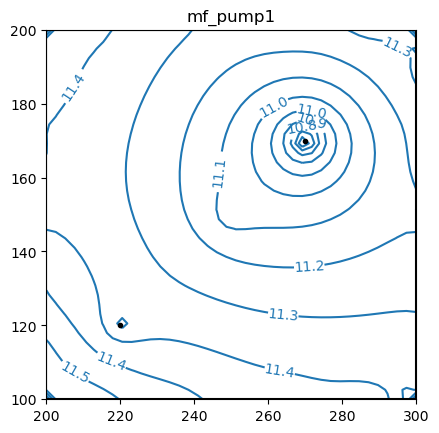

In [401]:
for kper, data in r.items():
    for name, awell in data['awells'].items():
        well_levels = data['well_levels']
        well_levels[name][-1][0].contour(win=awell.win, ngr=40, labels=True, legend=False, decimals=1)
        plt.title(name)
        plt.savefig(f'{name}_kper_{kper+1}.png')

In [281]:
r[2]

{'mf_pump5': [(Model,
   {'pump1': 11.005819384419848, 'pump2': 10.345149802954188}),
  (Model, {'pump1': 11.30328623871082, 'pump2': 10.791282092454994}),
  (Model, {'pump1': 11.305530974556918, 'pump2': 10.794325755673766}),
  (Model, {'pump1': 11.305776208853045, 'pump2': 10.794674783187247}),
  (Model, {'pump1': 11.305995043006398, 'pump2': 10.79497678746}),
  (Model, {'pump1': 11.306022741917921, 'pump2': 10.79501583757491}),
  (Model, {'pump1': 11.306037545479198, 'pump2': 10.795036487593073}),
  (Model, {'pump1': 11.306042430838461, 'pump2': 10.795043261235868}),
  (Model, {'pump1': 11.306043658984667, 'pump2': 10.795045010127106}),
  (Model, {'pump1': 11.306044323941233, 'pump2': 10.795045927715034})]}

In [282]:
r[3]

{'mf_pump7': [(Model, {'pump1': 10.274800762634987}),
  (Model, {'pump1': 9.679393438603352}),
  (Model, {'pump1': 9.678372325011587}),
  (Model, {'pump1': 9.677656161020343}),
  (Model, {'pump1': 9.677507649208456}),
  (Model, {'pump1': 9.677469660301684}),
  (Model, {'pump1': 9.677450395568986}),
  (Model, {'pump1': 9.677446920229666}),
  (Model, {'pump1': 9.67744476178284}),
  (Model, {'pump1': 9.677444215235901})],
 'mf_pump8': [(Model, {'pump1': 8.760337674721507}),
  (Model, {'pump1': 7.891051792860203}),
  (Model, {'pump1': 7.889765858570014}),
  (Model, {'pump1': 7.889000081739837}),
  (Model, {'pump1': 7.888913318736879}),
  (Model, {'pump1': 7.888879098232026}),
  (Model, {'pump1': 7.888864437204523}),
  (Model, {'pump1': 7.888861003099201}),
  (Model, {'pump1': 7.888859367867202}),
  (Model, {'pump1': 7.888858847799625})]}

In [283]:
from pymf6tools.plotting import show_heads, show_well_head, show_bcs

In [395]:
def save_head(kper):
    ax = show_heads(model_path='models/c_100_100_mw_ms', name='c_100_100', kstpkper=(9, kper), spdis_index=1, 
               title=f'Stress period {kper + 1}')
    fig = ax.figure
    fig.savefig(f'head_{kper + 1}')
    fig.clear()

In [396]:
for kper in range(1, 4):
    save_head(kper)

<Figure size 640x480 with 0 Axes>

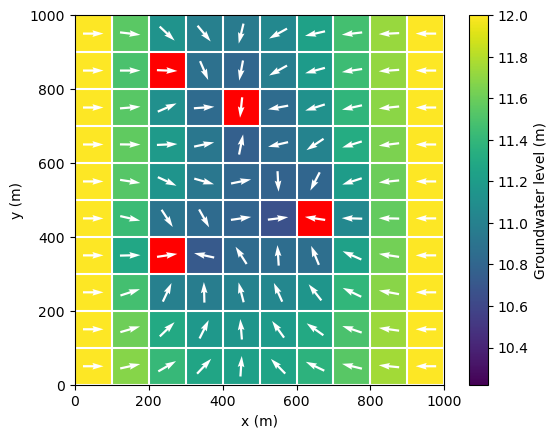

In [391]:
kper = 1
ax = show_heads(model_path='models/c_100_100_mw_ms', name='c_100_100', kstpkper=(9, kper), spdis_index=1, title='')

In [392]:
ax.figure.cl

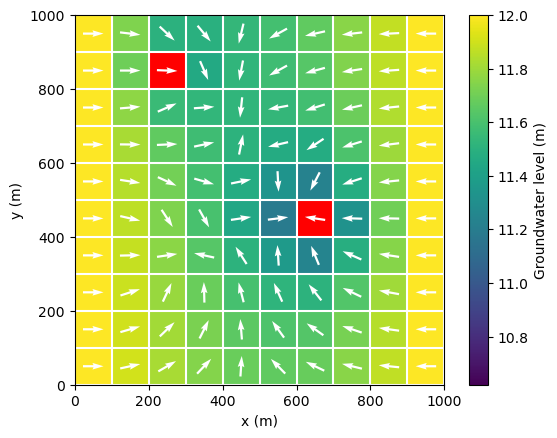

In [334]:
kper = 2
show_heads(model_path='models/c_100_100_mw_ms', name='c_100_100', kstpkper=(9, kper), spdis_index=1, title='')

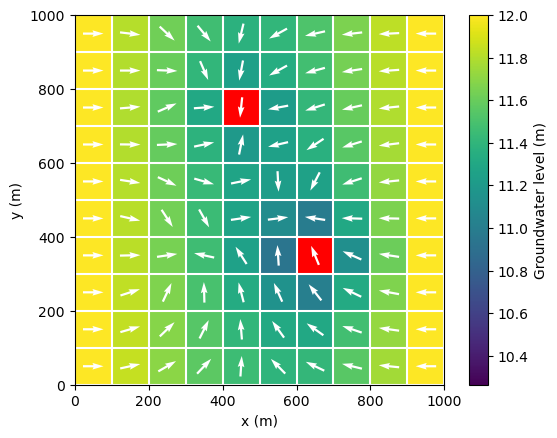

In [335]:
kper = 3
show_heads(model_path='models/c_100_100_mw_ms', name='c_100_100', kstpkper=(9, kper), spdis_index=1, title='')